In [ ]:
#!pip install langgraph
#!pip install nbconvert[web pdf]

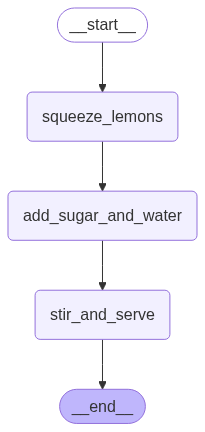

In [ ]:
from langgraph.graph import StateGraph
from typing import Dict, Any
from IPython.display import Image, display

# Define nodes
def squeeze_lemons(state: Dict[str, Any]) -> Dict[str, Any]:
    state["juice"] = f"Juice from {state.get('lemons', 0)} lemons"
    return state

def add_sugar_and_water(state: Dict[str, Any]) -> Dict[str, Any]:
    state["mix"] = f"{state['juice']} + {state.get('sugar', 0)} spoons sugar + {state.get('water', '')} water"
    return state

def stir_and_serve(state: Dict[str, Any]) -> Dict[str, Any]:
    state["final"] = f"{state['mix']} → Stirred and ready to serve!"
    return state

from typing import TypedDict

class LemonState(TypedDict):
    lemons: int
    sugar: int
    water: str
    juice: str
    mix: str
    final: str


# Build graph
builder = StateGraph(LemonState)
builder.add_node("squeeze_lemons", squeeze_lemons)
builder.add_node("add_sugar_and_water", add_sugar_and_water)
builder.add_node("stir_and_serve", stir_and_serve)

builder.set_entry_point("squeeze_lemons")
builder.add_edge("squeeze_lemons", "add_sugar_and_water")
builder.add_edge("add_sugar_and_water", "stir_and_serve")
builder.set_finish_point("stir_and_serve")

graph = builder.compile()

# ✅ Visualize as Mermaid PNG
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print("Visualization failed. Ensure Mermaid & pygraphviz dependencies are installed.")
    print(f"Error: {e}")


In [ ]:
# Initial input state
initial_state: LemonState = {
    "lemons": 4,
    "sugar": 2,
    "water": "1 glass",
    "juice": "",
    "mix": "",
    "final": ""
}

# Run the LangGraph
result = graph.invoke(initial_state)

# Print final result
print("🧃 Final Output:", result["final"])


🧃 Final Output: Juice from 4 lemons + 2 spoons sugar + 1 glass water → Stirred and ready to serve!
